In [1]:
from collections import defaultdict

import numpy as np

from tools.lorenz import Lorenz63
from tools.utils import iterate_solver, Runge_Kutta
%matplotlib widget

In [2]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

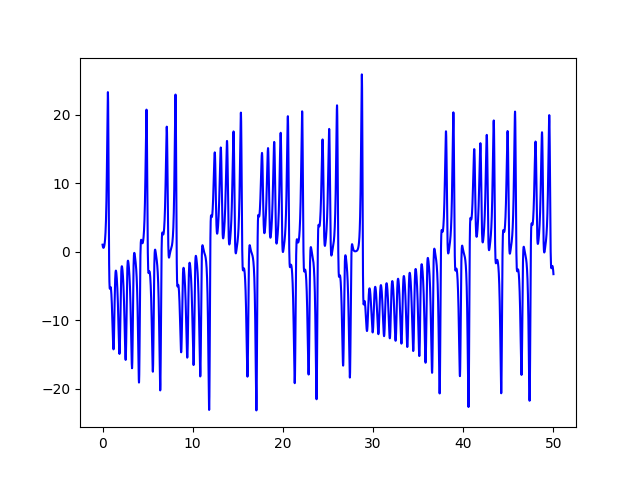

In [3]:
x, t = iterate_solver(Runge_Kutta, Lorenz63, [-1., 1., 18.4], 0, 0.01, 50.)
plot(t, x[:, 1], 'b-')

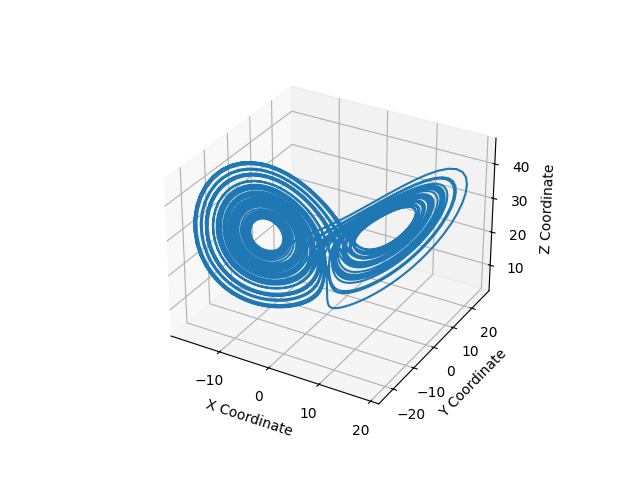

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.plot(x[:, 0], x[:, 1], x[:, 2])

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')

plt.show()

In [5]:
type(x)

numpy.ndarray

In [6]:
len(x)

5001

In [7]:
import copy
x_gapped = copy.deepcopy(x)

In [11]:
x_gapped[2000:2100] = np.nan
len(x_gapped), len(t)

(5001, 5001)

In [12]:
nan_count = np.sum(np.isnan(x_gapped)) / 3
nan_count

100.0

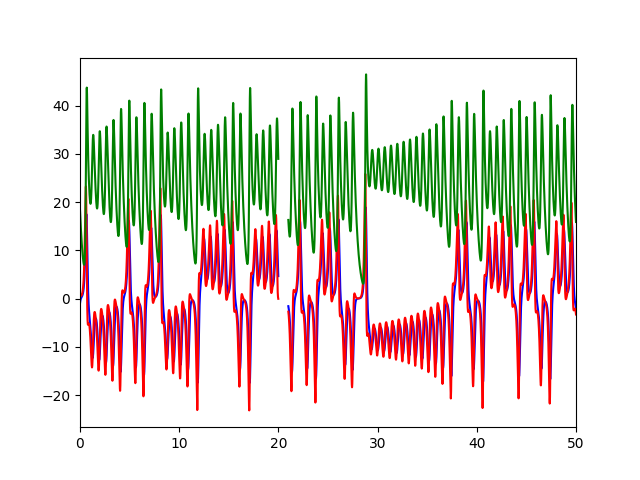

In [31]:
fig = plt.figure()
plot(t, x_gapped[:, 0], 'b-')
plot(t, x_gapped[:, 1], 'r-')
plot(t, x_gapped[:, 2], 'g-')

ts = x_gapped[:, 0]
plt.xlim(min(t), max(t))  # Set x limits to cover the full range of t
plt.show()

In [32]:
len(x_gapped[:, 0]), len(t)

(5001, 5001)

In [33]:
print(t.shape)
print(x_gapped.shape)
print(x_gapped[:, 0].shape)

(5001,)
(5001, 3)
(5001,)


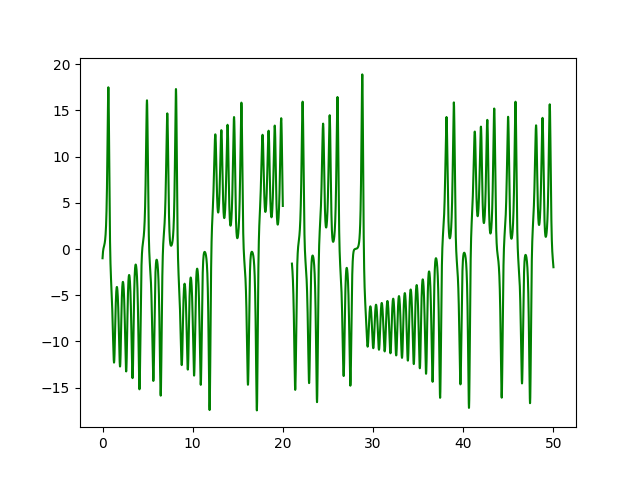

In [34]:
fig = plt.figure()
plot(t, ts, 'g-')

In [35]:
len(ts)

5001

In [36]:
indices = np.arange(0, len(ts), 10)

In [37]:
indices

array([   0,   10,   20,   30,   40,   50,   60,   70,   80,   90,  100,
        110,  120,  130,  140,  150,  160,  170,  180,  190,  200,  210,
        220,  230,  240,  250,  260,  270,  280,  290,  300,  310,  320,
        330,  340,  350,  360,  370,  380,  390,  400,  410,  420,  430,
        440,  450,  460,  470,  480,  490,  500,  510,  520,  530,  540,
        550,  560,  570,  580,  590,  600,  610,  620,  630,  640,  650,
        660,  670,  680,  690,  700,  710,  720,  730,  740,  750,  760,
        770,  780,  790,  800,  810,  820,  830,  840,  850,  860,  870,
        880,  890,  900,  910,  920,  930,  940,  950,  960,  970,  980,
        990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090,
       1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200,
       1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310,
       1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420,
       1430, 1440, 1450, 1460, 1470, 1480, 1490, 15

In [38]:
v_1_s = ts[indices]

In [39]:
indices2 = (indices + 1)
indices2 = indices2[:-1]
v_2_s = ts[indices2]

In [40]:
indices3 = (indices + 2)
indices3 = indices3[:-1]
v_3_s = ts[indices3]

In [41]:
v_1_s = v_1_s[:-1]

In [42]:
vectors = column_stack((v_1_s, v_2_s, v_3_s))

In [43]:
def get_dis_matrix(vectors):
    dis_matrix = np.zeros((len(vectors), len(vectors)))
    for m, i in enumerate(vectors):
        for n, j in enumerate(vectors):
            if any(isnan(i)) or any(isnan(j)):
                dis_matrix[m, n] = np.inf
                continue
            if m == n:
                dis_matrix[m, n] = np.inf
                continue
            dis_matrix[m, n] = linalg.norm(i - j)
    return dis_matrix
                

In [44]:
linalg.norm(vectors[0] - vectors[1])

1.589484932002537

In [45]:
vectors

array([[-1.        , -0.81455935, -0.65544343],
       [ 0.04204991,  0.08979239,  0.13369679],
       [ 0.44743763,  0.4918592 ,  0.53934628],
       ...,
       [ 8.33262969,  7.44005897,  6.58650641],
       [ 1.67715964,  1.29532625,  0.95466352],
       [-0.74803086, -0.88332236, -1.01056978]])

In [46]:
dis_matrix = get_dis_matrix(vectors)

In [47]:
dis_matrix

array([[        inf,  1.58948493,  2.2867723 , ..., 14.41119488,
         3.76978054,  0.4408305 ],
       [ 1.58948493,         inf,  0.70039163, ..., 12.82181282,
         2.19109153,  1.69721122],
       [ 2.2867723 ,  0.70039163,         inf, ..., 12.12525791,
         1.5265202 ,  2.39217663],
       ...,
       [14.41119488, 12.82181282, 12.12525791, ...,         inf,
        10.66633377, 14.47247869],
       [ 3.76978054,  2.19109153,  1.5265202 , ..., 10.66633377,
                inf,  3.80659962],
       [ 0.4408305 ,  1.69721122,  2.39217663, ..., 14.47247869,
         3.80659962,         inf]])

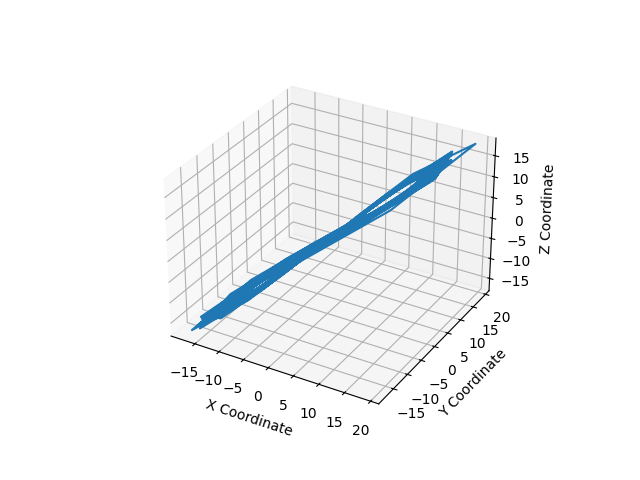

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.plot(vectors[:, 0], vectors[:, 1], vectors[:, 2])

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')

plt.show()

In [170]:
# !pip install ipympl

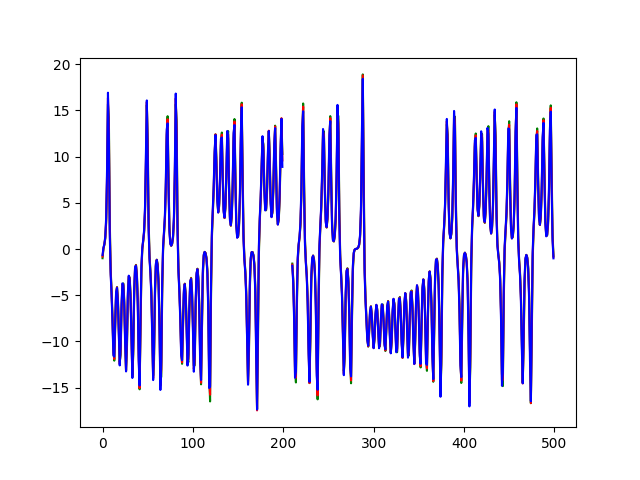

In [49]:
fig = plt.figure()
plot(arange(len(vectors)), vectors[:, 0], 'g-')
plot(arange(len(vectors)), vectors[:, 1], 'r-')
plot(arange(len(vectors)), vectors[:, 2], 'b-')

In [50]:
def get_breaking_points(vectors):
    # Create a boolean mask where each sub-array is checked for NaN
    contains_nan = np.array([np.any(np.isnan(vector)) for vector in vectors])
    
    # Find the index of the first sub-array containing NaN
    first_nan_index = np.argmax(contains_nan)
    # first_with_nan = arrays[first_nan_index] if np.any(contains_nan) else None
    
    # Find the index of the last sub-array containing NaN
    # np.max(np.where(contains_nan)[0]) provides the last index with True
    last_nan_index = np.max(np.where(contains_nan)[0]) if np.any(contains_nan) else None
    # last_with_nan = arrays[last_nan_index] if last_nan_index is not None else None
    
    return first_nan_index, last_nan_index

In [51]:
first_nan_index, last_nan_index = get_breaking_points(vectors)

In [52]:
first_nan_index

200

In [53]:
last_nan_index

209

In [54]:
vectors[first_nan_index - 1]

array([10.2923708 ,  9.59186354,  8.888964  ])

In [55]:
vectors[last_nan_index]

array([nan, nan, nan])

In [56]:
last_valid_v_index = first_nan_index - 1
next_valid_v_index = last_nan_index + 1
l = next_valid_v_index - last_valid_v_index

In [57]:
dis_matrix[last_valid_v_index]

array([18.08056936, 16.49282081, 15.7939515 , 14.55868094, 11.34621452,
        3.43052589, 11.79431908,  6.01438878, 12.73234273, 20.94818707,
       24.86383871, 29.75267702, 36.01171858, 37.21026881, 30.59424624,
       25.00563872, 23.83610122, 26.26390284, 32.00495651, 38.13459794,
       35.75209119, 27.64237263, 23.2567466 , 23.24113133, 26.63121593,
       33.51724264, 39.465039  , 34.38130148, 25.54439079, 21.76719105,
       22.09693809, 25.58942048, 32.99979166, 40.55240709, 35.3326563 ,
       24.86128511, 20.19643136, 19.68679589, 21.56120911, 26.61798336,
       36.55200709, 42.62057083, 31.04727168, 20.35856243, 16.54192804,
       15.10698036, 13.3708168 ,  9.41853622,  2.00523035, 10.94161178,
        2.31989196, 12.23303053, 18.25791743, 21.02389959, 24.85674441,
       32.3251493 , 40.80054661, 36.25425601, 24.94958347, 19.65073596,
       18.66078005, 19.66591821, 22.86181591, 30.46463897, 42.17574317,
       39.15417754, 23.98101921, 16.46489889, 13.64168595, 10.81

In [58]:
closest_point_index = np.argmin(dis_matrix[last_valid_v_index])

In [59]:
closest_point_index

185

In [60]:
dis_matrix[last_valid_v_index, closest_point_index]

0.3264913367868948

In [61]:
vectors[closest_point_index], vectors[first_nan_index - 1], first_nan_index - 1, closest_point_index

(array([10.19749426,  9.69550573,  9.18367289]),
 array([10.2923708 ,  9.59186354,  8.888964  ]),
 199,
 185)

In [190]:
# def get_closest_point_index()
def get_one_branch(index: int, vectors: np.array, rest_steps: int, forward_branches_df: dict ,forward_branches_df_reverse,  forward: bool = True):
    # root_node = vectors[index]
    # forward_branches_df[index]
    # rest steps = l - j 
    
    #        next_node
    #         /
    # vectors[index] 
    #         \
    #        next_node_2
    
    step = 1 if forward else -1
    
    curr_root = index
    curr_child = curr_root + step
    print("start of the branch -------")
    for i in range(rest_steps):
        if curr_child >= len(vectors):
            # print(f"curr_child: {curr_child}")
            break
        if np.any(isnan(vectors[curr_child])):
            print(f"curr_child is NaN")
            break
        forward_branches_df[curr_root].add(curr_child)
        forward_branches_df_reverse[curr_child] = curr_root
        # print(f"check vectors[curr_child]: {vectors[curr_child]}")
        # forward_branches_bf[curr_layer_num + i].append(curr_root)
        curr_root = curr_root + step
        curr_child = curr_root + step
    
    print(f"finished current branch -------- ")
    
    return forward_branches_df, forward_branches_df_reverse

def get_branches_forward(last_valid_v_index: int, next_valid_v_index: int, n_f: int, r: int, vectors: np.array, dis_matrix: np.array):
    # TODO: finish the second condition: or until a valid seccussor
    
    l = next_valid_v_index - last_valid_v_index - 1
    # layer_num = (l // r) + 1 # +1 to make give some extra space
    
    forward_branches_df = defaultdict(set)
    forward_branches_df_reverse = dict()
    # forward_branches_bf = [[] for _ in range(layer_num)]
    
    # get_one_branch(index = last_valid_v_index, vectors=vectors, rest_steps=l - last_valid_v_index, forward_branches_df=forward_branches_df, forward_branches_bf=forward_branches_bf, curr_layer_num=0)
    
    curr_node_index = last_valid_v_index 
    
    for i in range(n_f): # + 1 because zero included
        if last_valid_v_index + (i * (1 + r)) >= next_valid_v_index:
            break
        print("test")
        # jump_to_node_index = last_valid_v_index + ((i + 1) * r)
        jump_to_index = np.argmin(dis_matrix[curr_node_index])
        print(f"step: {i}")
        print(f"jump_to_index: {jump_to_index}")
        forward_branches_df[curr_node_index].add(jump_to_index)
        forward_branches_df_reverse[jump_to_index] = curr_node_index
        forward_branches_df, forward_branches_df_reverse = get_one_branch(index = jump_to_index, vectors=vectors, rest_steps= l - (i * (r + 1)) - 1, forward_branches_df=forward_branches_df, forward = True, forward_branches_df_reverse = forward_branches_df_reverse)
        curr_node_index = jump_to_index + r
    return forward_branches_df, forward_branches_df_reverse

def get_branches_backward(last_valid_v_index: int, next_valid_v_index: int, n_b: int, r: int, vectors: np.array, dis_matrix: np.array):
    # TODO: finish the second condition: or until a valid seccussor
    
    l = next_valid_v_index - last_valid_v_index - 1
    # layer_num = (l // r) + 1 # +1 to make give some extra space
    
    back_branches_df = defaultdict(set)
    # forward_branches_bf = [[] for _ in range(layer_num)]
    
    # get_one_branch(index = last_valid_v_index, vectors=vectors, rest_steps=l - last_valid_v_index, forward_branches_df=forward_branches_df, forward_branches_bf=forward_branches_bf, curr_layer_num=0)
    
    curr_node_index = next_valid_v_index 
    
    for i in range(n_b): # + 1 because zero included
        if last_valid_v_index + (i * (1 + r)) >= next_valid_v_index:
            break
        print("test")
        # jump_to_node_index = last_valid_v_index + ((i + 1) * r)
        jump_to_index = np.argmin(dis_matrix[curr_node_index])
        # print(f"step: {i}")
        # print(f"jump_to_index: {jump_to_index}")
        back_branches_df[curr_node_index].add(jump_to_index)
        back_branches_df = get_one_branch(index = jump_to_index, vectors=vectors, rest_steps= l - (i * (r + 1)) - 1, forward_branches_df=back_branches_df, forward = False)
        curr_node_index = jump_to_index - r
    return back_branches_df

In [191]:
forward_branches_df, forward_branches_df_reverse = get_branches_forward(last_valid_v_index=last_valid_v_index, 
                                   next_valid_v_index=next_valid_v_index, 
                                   n_f=5, r=2, vectors=vectors, dis_matrix=dis_matrix)

test
step: 0
jump_to_index: 185
start of the branch -------
finished current branch -------- 
test
step: 1
jump_to_index: 416
start of the branch -------
finished current branch -------- 
test
step: 2
jump_to_index: 243
start of the branch -------
finished current branch -------- 
test
step: 3
jump_to_index: 139
start of the branch -------
finished current branch -------- 


In [172]:
vectors[closest_point_index], vectors[first_nan_index - 1], last_valid_v_index, next_valid_v_index, next_valid_v_index - last_valid_v_index

(array([10.19749426,  9.69550573,  9.18367289]),
 array([10.2923708 ,  9.59186354,  8.888964  ]),
 199,
 210,
 11)

In [193]:
forward_branches_df_reverse

{185: 199,
 186: 185,
 187: 186,
 188: 187,
 189: 188,
 190: 189,
 191: 190,
 192: 191,
 193: 192,
 194: 193,
 416: 187,
 417: 416,
 418: 417,
 419: 418,
 420: 419,
 421: 420,
 422: 421,
 243: 418,
 244: 243,
 245: 244,
 246: 245,
 139: 245}

In [192]:
forward_branches_df

defaultdict(set,
            {199: {185},
             185: {186},
             186: {187},
             187: {188, 416},
             188: {189},
             189: {190},
             190: {191},
             191: {192},
             192: {193},
             193: {194},
             416: {417},
             417: {418},
             418: {243, 419},
             419: {420},
             420: {421},
             421: {422},
             243: {244},
             244: {245},
             245: {139, 246}})

In [177]:
backward_branches_df = get_branches_backward(last_valid_v_index=last_valid_v_index, 
                                   next_valid_v_index=next_valid_v_index, 
                                   n_b=5, r=2, vectors=vectors, dis_matrix=dis_matrix)

test
start of the branch -------
finished current branch -------- 
test
start of the branch -------
finished current branch -------- 
test
start of the branch -------
finished current branch -------- 
test
start of the branch -------
finished current branch -------- 


In [178]:
backward_branches_df

defaultdict(set,
            {210: {393},
             393: {392},
             392: {391},
             391: {383, 390},
             390: {389},
             389: {388},
             388: {387},
             387: {386},
             386: {385},
             385: {384},
             383: {382},
             382: {381},
             381: {198, 380},
             380: {379},
             379: {378},
             378: {377},
             198: {197},
             197: {196},
             196: {195, 456}})

In [143]:
def tree_to_layers(tree, queue):
    layers = []
    # queue = [("root", 0)]  # Queue of tuples (node, layer_index)

    while queue:
        current_node, layer = queue.pop(0)
        
        # Ensure the layer exists in the layers list
        if len(layers) <= layer:
            layers.append([])
        
        # Append the current node to its respective layer
        layers[layer].append(current_node)
        
        # Enqueue all children of the current node
        for child in tree.get(current_node, []):
            queue.append((child, layer + 1))
    
    return layers

# Example tree
tree = {
    "root": ["child1", "child2"],
    "child1": ["grandchild1", "grandchild2", "grandchild3"],
    "grandchild2": ["a", 'b', "c"],
    "child2": ["child2's child1", "child2's child3"],
}

# Convert tree to layers
# layers = tree_to_layers(tree)
# print(layers)


In [144]:
forward_layer = tree_to_layers(forward_branches_df, queue = [(199, 0)])

In [145]:
forward_layer

[[199],
 [185],
 [186],
 [187],
 [416, 188],
 [417, 189],
 [418, 190],
 [419, 243, 191],
 [420, 244, 192],
 [421, 245, 193],
 [422, 139, 246, 194]]

In [146]:
len(forward_layer)

11

In [180]:
backward_layer = tree_to_layers(backward_branches_df, queue = [(210, 0)])

In [181]:
backward_layer

[[210],
 [393],
 [392],
 [391],
 [390, 383],
 [389, 382],
 [388, 381],
 [387, 380, 198],
 [386, 379, 197],
 [385, 378, 196],
 [384, 377, 456, 195]]

In [182]:
len(backward_layer)

11

In [187]:
def get_closest_points_layer(vectors, forward_layer, backward_layer):
    l = len(forward_layer) - 1
    closest_dis = float('inf')
    closest_forward_index = 0
    closest_forward_index_sub = 0
    closest_backward_index_sub = 0
    for i in range(l):
        forward_vectors = forward_layer[i]
        backward_vectors = backward_layer[l - i]
        forward_sub_index, backward_sub_index, dis = get_closest_points_one_layer(vectors, forward_vectors, backward_vectors)
        if dis < closest_dis:
            closest_dis = dis
            closest_forward_index = i
            closest_forward_index_sub = forward_sub_index
            closest_backward_index_sub = backward_sub_index
    return closest_dis, closest_forward_index, closest_forward_index_sub, closest_backward_index_sub

def get_closest_points_one_layer(vectors, forward_vectors, backward_vectors):
    min_dis = float('inf')
    forward_sub_index = 0
    backward_sub_index = 0
    for n, i in enumerate(forward_vectors):
        for m, j in enumerate(backward_vectors):
            curr_dis = linalg.norm(vectors[i] - vectors[j])
            if curr_dis < min_dis:
                min_dis = curr_dis
                forward_sub_index = n
                backward_sub_index = m
    return forward_sub_index, backward_sub_index, min_dis

In [188]:
closest_dis, closest_forward_index, closest_forward_index_sub, closest_backward_index_sub = get_closest_points_layer(vectors=vectors, forward_layer=forward_layer, backward_layer=backward_layer)

(0.46095557331336956, 3, 0, 0)

In [189]:
linalg.norm(vectors[387] - vectors[187])

0.46095557331336956